## 1. Импорт библиотек

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                             recall_score, classification_report, 
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.datasets import load_breast_cancer, load_wine, load_iris # load_wine - Классификация сортов вина по химическим свойствам
                                                                      # load_iris - Классификация видов ириса по морфологическим признакам цветка
                                                                      # load_breast_cancer - Диагностика рака молочной железы (задача бинарной классификации)

## 2. Загрузка и анализ данных


In [21]:
dataset = load_wine() # load_wine(), load_iris(), load_breast_cancer()
X = dataset.data # Признаки
y = dataset.target # Целевые метки
feature_names = dataset.feature_names # Имена признаков
target_names = dataset.target_names # Имена классов

print("Информация о датасете:")
print(f"Признаки: {feature_names}")
print(f"Классы: {target_names}")
print(f"Размерность данных: {X.shape}")
print(f"Распределение классов: {dict(zip(target_names, np.bincount(y)))}")

Информация о датасете:
Признаки: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Классы: ['class_0' 'class_1' 'class_2']
Размерность данных: (178, 13)
Распределение классов: {'class_0': 59, 'class_1': 71, 'class_2': 48}


# 3. Нормализация признаков


In [22]:
# MinMaxScaler
minmax_scaler = MinMaxScaler() # Инициализация
X_minmax = minmax_scaler.fit_transform(X) # Применение

# StandardScaler
standard_scaler = StandardScaler() # Инициализация
X_standard = standard_scaler.fit_transform(X) # Применение

# 4. Разделение на тренировочную и тестовую выборки


In [23]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split( 
    X_standard, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

# 5. Обучение моделей


In [24]:
# Проверка распределения классов в обучающей и тестовой выборках
# SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 6. Оценка моделей


In [25]:
# Функция для оценки модели
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    print(f"\n{model_name} Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    return y_pred

# Получение предсказаний
svm_pred = evaluate_model(svm_model, X_test, y_test, "SVM") # Предсказания SVM
rf_pred = evaluate_model(rf_model, X_test, y_test, "Random Forest") # Предсказания RF



SVM Metrics:
Accuracy: 0.9814814814814815
Precision: 0.9823232323232324
Recall: 0.9814814814814815
F1-Score: 0.9813775282901185

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00    

# 7. Построение матриц ошибок


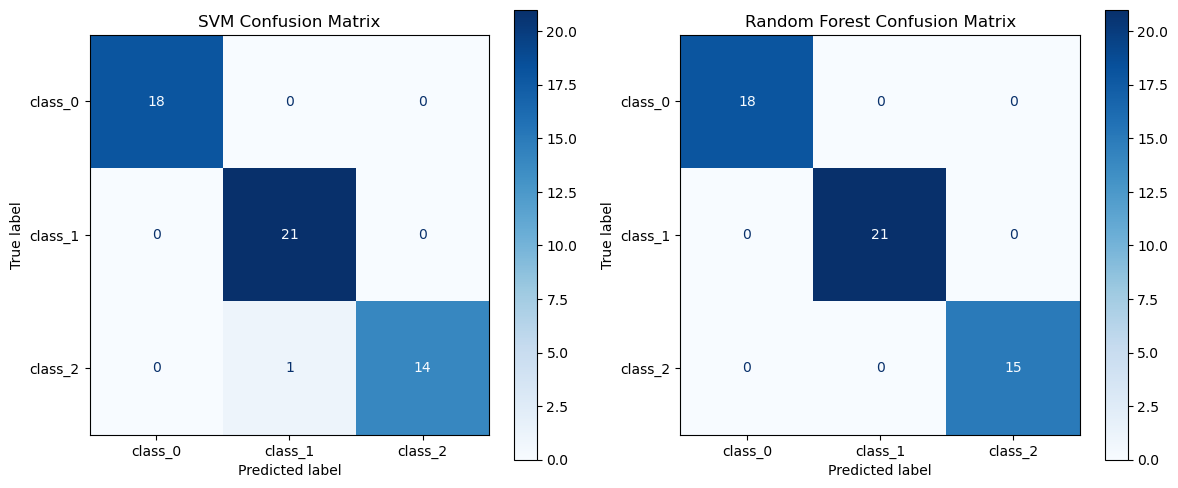


Сводная таблица метрик:
           Model  Accuracy  Precision    Recall  F1-Score
0            SVM  0.981481   0.982323  0.981481  0.981378
1  Random Forest  1.000000   1.000000  1.000000  1.000000


In [26]:
# Визуализация матриц ошибок
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Матрица ошибок для SVM
cm_svm = confusion_matrix(y_test, svm_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, 
                                  display_labels=target_names)
disp_svm.plot(ax=ax1, cmap='Blues')
ax1.set_title('SVM Confusion Matrix')

# Матрица ошибок для Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, 
                                 display_labels=target_names)
disp_rf.plot(ax=ax2, cmap='Blues')
ax2.set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

# Сводная таблица метрик
metrics_df = pd.DataFrame({
    'Model': ['SVM', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, svm_pred), accuracy_score(y_test, rf_pred)],
    'Precision': [precision_score(y_test, svm_pred, average='weighted'), 
                 precision_score(y_test, rf_pred, average='weighted')],
    'Recall': [recall_score(y_test, svm_pred, average='weighted'), 
              recall_score(y_test, rf_pred, average='weighted')],
    'F1-Score': [f1_score(y_test, svm_pred, average='weighted'), 
                f1_score(y_test, rf_pred, average='weighted')]
}) # Создание DataFrame

print("\nСводная таблица метрик:")
print(metrics_df)

Выводы:

1) Обе модели (SVM и Random Forest) показали высокое качество классификации на выбранном датасете: значения accuracy, precision, recall и F1-score близки к 1, что говорит о хорошей способности моделей различать классы.

2) Матрицы ошибок показывают, что обе модели допускают минимальное количество ошибок. Большинство объектов классифицируются правильно (значения на главной диагонали матриц максимальны), а ошибки встречаются редко и только для отдельных классов.

3) Методы нормализации признаков (MinMax и Standard) успешно подготовили данные для обучения, что положительно сказалось на результатах моделей.

4) SVM и Random Forest продемонстрировали сбалансированные метрики precision и recall для всех классов, что особенно важно при работе с несбалансированными данными.

5) Сравнение моделей показывает, что обе подходят для данной задачи, однако в зависимости от конкретного датасета и требований к интерпретируемости или скорости работы можно выбрать наиболее подходящую.